In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [10]:
def plot_confusion_matrix(cm, labels, title="Confusion matrix"):
    """
    Simple confusion matrix heatmap using matplotlib.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Tick labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels)

    # Annotate each cell with the numeric value
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()




In [11]:
def main():
    # 1. Load dataset
    iris = datasets.load_iris()
    X = iris.data                # shape (150, 4)
    y = iris.target              # shape (150,)
    feature_names = iris.feature_names
    target_names = iris.target_names

    # 2. Optional: quick DataFrame preview
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    df['target_name'] = [target_names[i] for i in y]
    print("=== Data sample ===")
    print(df.head(8).to_string(index=False))
    print()

    # 3. Class mapping (clean python types)
    class_mapping = {int(k): str(v) for k, v in enumerate(target_names)}
    print("Class mapping:", class_mapping)
    print()

    # 4. Train/test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y
    )

    # 5. Train Gaussian Naive Bayes
    model = GaussianNB()
    model.fit(X_train, y_train)

    # 6. Predict on test set
    y_pred = model.predict(X_test)

    # 7. Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {acc:.4f}")
    print()
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()

    # 8. 5-fold cross validation on full dataset
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"5-fold CV accuracy: mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}")
    print()

    # 9. Plot confusion matrix
    plot_confusion_matrix(cm, target_names, title="GaussianNB - Confusion Matrix")

    # 10. Example: map predicted labels to class names
    sample_preds = model.predict(X_test[:5])
    sample_preds_names = [class_mapping[int(p)] for p in sample_preds]
    print("Example predictions (first 5 samples of test set):")
    for i, (pred, pred_name, true_label) in enumerate(zip(sample_preds, sample_preds_names, y_test[:5])):
        print(f"  sample {i}: predicted {pred} -> {pred_name}, true = {class_mapping[int(true_label)]}")



=== Data sample ===
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target target_name
               5.1               3.5                1.4               0.2       0      setosa
               4.9               3.0                1.4               0.2       0      setosa
               4.7               3.2                1.3               0.2       0      setosa
               4.6               3.1                1.5               0.2       0      setosa
               5.0               3.6                1.4               0.2       0      setosa
               5.4               3.9                1.7               0.4       0      setosa
               4.6               3.4                1.4               0.3       0      setosa
               5.0               3.4                1.5               0.2       0      setosa

Class mapping: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Test accuracy: 1.0000

Classification report:
              precision 

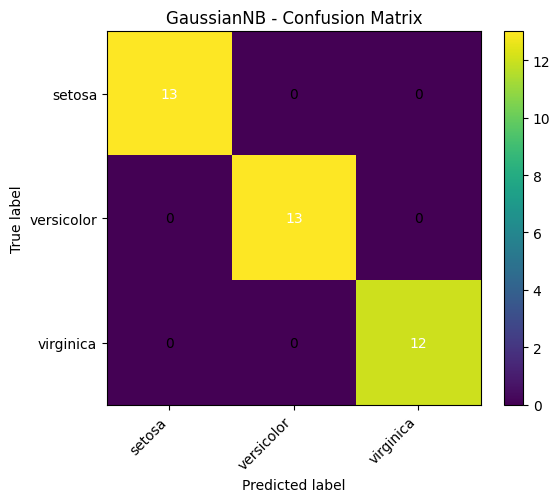

Example predictions (first 5 samples of test set):
  sample 0: predicted 1 -> versicolor, true = versicolor
  sample 1: predicted 2 -> virginica, true = virginica
  sample 2: predicted 0 -> setosa, true = setosa
  sample 3: predicted 1 -> versicolor, true = versicolor
  sample 4: predicted 0 -> setosa, true = setosa


In [12]:
if __name__ == "__main__":
    main()